In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
import pickle
from sklearn import preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
metrics_df = pd.read_csv('/content/drive/MyDrive/df.csv')

In [ ]:
metrics_df.head(2)

,Unnamed: 0,ds,jobs,cpu,memory,io_read,io_readReal,io_readSyscalls,io_write,io_writeCancelled,...,network_rxPackets,network_txBytes,network_txCarrier,network_txColls,network_txCompressed,network_txDrop,network_txErrors,network_txFifo,network_txPackets,idx
0,0,2020-04-29 01:00:43,0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0.0,10
1,1,2020-04-29 01:00:53,2,189.0,685977600,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0.0,10


In [ ]:
metrics_df.columns

Index(['Unnamed: 0', 'ds', 'jobs', 'cpu', 'memory', 'io_read', 'io_readReal',
       'io_readSyscalls', 'io_write', 'io_writeCancelled', 'io_writeReal',
       'io_writeSyscalls', 'network_rxBytes', 'network_rxCompressed',
       'network_rxDrop', 'network_rxErrors', 'network_rxFifo',
       'network_rxFrame', 'network_rxMulticast', 'network_rxPackets',
       'network_txBytes', 'network_txCarrier', 'network_txColls',
       'network_txCompressed', 'network_txDrop', 'network_txErrors',
       'network_txFifo', 'network_txPackets', 'idx'],
      dtype='object')

In [ ]:
metrics_df.describe()

,Unnamed: 0,jobs,cpu,memory,io_read,io_readReal,io_readSyscalls,io_write,io_writeCancelled,io_writeReal,...,network_rxPackets,network_txBytes,network_txCarrier,network_txColls,network_txCompressed,network_txDrop,network_txErrors,network_txFifo,network_txPackets,idx
count,111619.000000,111619.000000,111619.000000,1.116190e+05,1.116190e+05,1.116190e+05,111619.000000,1.116190e+05,111619.000000,1.116190e+05,...,111619.000000,111619.000000,111619.0,111619.0,111619.0,111619.0,111619.0,111619.0,111619.000000,111619.000000
mean,1296.957937,1.565943,162.937370,1.171356e+09,3.300518e+06,1.282914e+06,470.259116,2.049469e+05,0.222515,2.097000e+05,...,0.543586,25.334401,0.0,0.0,0.0,0.0,0.0,0.0,0.288392,163.224335
std,1380.842011,2.114672,219.114396,1.625314e+09,1.325075e+07,5.856631e+06,1788.353682,2.235944e+06,8.444298,2.237911e+06,...,2.421854,109.868206,0.0,0.0,0.0,0.0,0.0,0.0,1.244258,82.459618
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,10.000000
25%,324.000000,1.000000,99.647931,5.082235e+08,3.499200e+04,0.000000e+00,0.711111,2.755556e+00,0.000000,4.551111e+02,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,79.000000
50%,823.000000,1.000000,100.000000,7.306936e+08,6.994453e+04,0.000000e+00,1.066667,4.133333e+00,0.000000,8.192000e+02,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,159.000000
75%,1828.000000,1.000000,100.500000,1.198064e+09,4.427633e+05,3.495253e+05,2.288889,5.511111e+00,0.000000,9.102222e+02,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,208.000000
max,8148.000000,61.000000,4108.022388,4.405613e+10,6.806955e+08,1.999750e+08,75784.844444,5.981062e+07,358.020741,5.981107e+07,...,94.511111,5098.933333,0.0,0.0,0.0,0.0,0.0,0.0,58.666667,317.000000


In [ ]:
indexes = metrics_df['idx'].unique()

In [ ]:
metrics_df['ds'].min(), metrics_df['ds'].max()

('2020-04-28 08:18:32', '2021-03-11 18:24:13')

In [ ]:
columns = list(metrics_df.columns)

In [ ]:
def get_flow_param_in_time(flow, param):
    return metrics_df[metrics_df['idx']==flow]['ds'],metrics_df[metrics_df['idx']==flow][param]

In [ ]:
indexes

array([ 10,  15,  18,  33,  45,  46,  48,  50,  51,  52,  57,  59,  61,
        65,  66,  67,  68,  69,  70,  71,  74,  75,  76,  78,  79,  80,
        86,  87,  89,  90, 105, 113, 120, 121, 124, 125, 153, 154, 156,
       158, 159, 160, 161, 164, 165, 166, 167, 175, 176, 178, 180, 184,
       186, 187, 191, 193, 195, 196, 200, 201, 202, 207, 208, 211, 212,
       215, 216, 231, 275, 276, 280, 283, 284, 285, 287, 288, 289, 294,
       299, 300, 301, 304, 305, 306, 311, 313, 317])

In [ ]:
train, test = metrics_df[metrics_df['idx']<215].copy(), metrics_df[metrics_df['idx']>=215].copy()
train_indxs, test_indxs = train['idx'].unique(), test['idx'].unique()

In [ ]:
train['ds']=pd.to_datetime(train['ds'])
test['ds'] = pd.to_datetime(test['ds'])

In [ ]:
train['ds']=(train['ds'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
test['ds']=(test['ds'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

In [ ]:
def many_2_many_split(data_X, data_y, past_window_size=80, future_window_size = 20):
    X = []
    Y = []
    for i in range(past_window_size, len(data_X)-future_window_size):
        X.append(np.array(data_X[i-past_window_size:i,:]))
        Y.append(np.array(data_y[i:i+future_window_size]))
    return X,Y

In [ ]:
def create_data(data, data_indx, params_x, params_y, future_window_size, past_window_size):
    data_X, data_y = [], []
    for indx in data_indx:
        X, Y= many_2_many_split(data[data['idx']==indx][params_x].values,data[data['idx']==indx][params_y].values, past_window_size, future_window_size)
        data_X.append(X)
        data_y.append(Y)
    d_X = np.array(data_X[0])
    d_y = np.array(data_y[0])
    for i in range(1,len(data_X)):
        data_X[i] = np.array(data_X[i])
        data_y[i] = np.array(data_y[i])
        d_X = np.concatenate((d_X, data_X[i]))
        d_y = np.concatenate((d_y, data_y[i]))
    return d_X, d_y

**Prediction**

metric functions

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

def rmse(pred, real):
    return sqrt(mean_squared_error(pred, real))

def smape(A, F):
    tmp = 2 * np.abs(F - A) / (np.abs(A) + np.abs(F))
    len_ = np.count_nonzero(~np.isnan(tmp))
    if len_ == 0 and np.nansum(tmp) == 0: # Deals with a special case
        return 100
    return 100 / len_ * np.nansum(tmp)

In [ ]:
def prepare_data(X):
    return X.reshape((X.shape[0], X.shape[1]*X.shape[2]))

In [ ]:
def to_torch(data, normalize = False):
    if normalize:
        scaler = preprocessing.MinMaxScaler()
        data = scaler.fit_transform(data)
    return torch.tensor(data)

In [ ]:
def create_esn(input_size, l_r=1.3057770274947211, s_r = 396, h_s  = 52):

    # [I 2023-04-25 14:55:10,561] Trial 457 finished with value: 0.08370441392511253 and parameters: {'leaky_rate': 1.3057770274947211, 'spectral_radius': 396, 'hidden_size': 52}. Best is trial 457 with value: 0.08370441392511253.
    activation = self_normalizing_default(leaky_rate=l_r, spectral_radius=s_r)

    # initialize the esn
    esn = GroupedDeepESN(
        # You need to specify the dimensionality of the input
        # it will later be checked whether the data provided matches the declared shape
        input_size=input_size,
        groups=3,
        num_layers=(2,4,3),
        hidden_size=h_s,
        initializer=regular_graph_initializer(seed=3, degree=10),
        activation=activation
    )
    return esn

prediciton input

In [ ]:
params_X = [
            # 'ds',
            'jobs',
            'cpu',
            'memory',
            'io_read',
            'io_readReal',
            'io_readSyscalls',
            'io_write',
            'io_writeReal',
            'io_writeSyscalls',
            'network_rxBytes',
            'network_txPackets'
            ]
params_y = [
    # 'jobs',
    'cpu',
    # 'memory'
    ]

In [ ]:
import torch

run experiment

CPU prediction

In [ ]:
f,p = 12, 80
train_X, train_y = create_data(train, train_indxs, params_X, params_y, f, p)
test_X, test_y = create_data(test, test_indxs, params_X, params_y, f, p)

train_X, train_y = prepare_data(train_X), prepare_data(train_y)
test_X, test_y = prepare_data(test_X), prepare_data(test_y)

train_X_torch, train_y_torch = to_torch(train_X, True),to_torch(train_y, True)
test_X_torch, test_y_torch = to_torch(test_X, True), to_torch(test_y, True)

In [ ]:
def get_metrics(results, real):
    metrics = [[],[],[]]
    for i in range(len(results)):
        # print(results[i])
        # print(real[i])
        # print('rmse = ', rmse(results[i], real[i]))
        metrics[0].append(rmse(results[i], real[i]))
        metrics[1].append(smape(results[i], real[i]))
        metrics[2].append(mean_absolute_error(results[i], real[i]))
    metrics = torch.tensor(metrics)
    ms = torch.mean(metrics, axis=1)
    # print(ms)
    return {'rmse':ms[0], 'smape':ms[1], 'mae':ms[2]}

In [ ]:
# load auto-esn from github
!git clone https://github.com/Ro6ertWcislo/AutoESN.git

fatal: destination path 'AutoESN' already exists and is not an empty directory.


In [ ]:
!mv /content/AutoESN/src/auto_esn  .

mv: cannot stat '/content/AutoESN/src/auto_esn': No such file or directory


In [ ]:
pip install optuna


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.7 MB/s eta 0:00:00


In [ ]:
from auto_esn.esn.reservoir.activation import self_normalizing_default
from auto_esn.esn.reservoir.initialization import CompositeInitializer, WeightInitializer
from auto_esn.esn.esn import GroupedDeepESN
import optuna

def regular_graph_initializer(seed, degree):
    # initialize input weights with uniform distribution from -1 to 1 and specified seed to reproduce results
    input_weight = CompositeInitializer().with_seed(seed).uniform()

    # specified operations will be done one by one, so this "builder" can be seen as a list of transforms
    # first set the seed and start with uniform distribution
    # then treat the newly created dense matrix as adjacency matrix and transform it into regular graph with
    # desired degree, then apply spectral normalization, so that spectral radius is 1.
    # at the end scale the matrix by factor 0.9 and the initialization is done
    reservoir_weight = CompositeInitializer() \
        .with_seed(seed) \
        .uniform() \
        .regular_graph(degree) \
        .spectral_normalize() \
        .scale(0.9)

    return WeightInitializer(weight_ih_init=input_weight, weight_hh_init=reservoir_weight)

In [ ]:
f,p = 1, 2
train_X, train_y = create_data(train, train_indxs, ['cpu'], ['cpu'], f, p)
test_X, test_y = create_data(test, test_indxs, ['cpu'], ['cpu'], f, p)

train_X, train_y = prepare_data(train_X), prepare_data(train_y)
test_X, test_y = prepare_data(test_X), prepare_data(test_y)

train_X_torch, train_y_torch = to_torch(train_X, False),to_torch(train_y, False)
test_X_torch, test_y_torch = to_torch(test_X, False), to_torch(test_y, False)

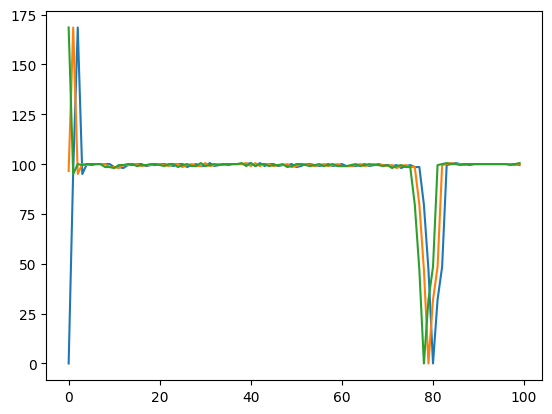

In [ ]:
plt.plot(test_X_torch[:100])
plt.plot(test_y_torch[:100])

In [ ]:
def create_esn(input_size, l_r=1.3057770274947211, s_r = 396, h_s  = 52):

    # [I 2023-04-25 14:55:10,561] Trial 457 finished with value: 0.08370441392511253 and parameters: {'leaky_rate': 1.3057770274947211, 'spectral_radius': 396, 'hidden_size': 52}. Best is trial 457 with value: 0.08370441392511253.
    activation = self_normalizing_default(leaky_rate=l_r, spectral_radius=s_r)

    # initialize the esn
    esn = GroupedDeepESN(
        # You need to specify the dimensionality of the input
        # it will later be checked whether the data provided matches the declared shape
        input_size=input_size,
        groups=5,
        num_layers=(2,4,2,2,3),
        hidden_size=h_s,
        initializer=regular_graph_initializer(seed=3, degree=12),
        activation=activation
    )
    return esn

In [ ]:
input_size = train_X_torch.shape[1]
network = create_esn(input_size)

network.fit(train_X_torch, train_y_torch)

results = network(test_X_torch)


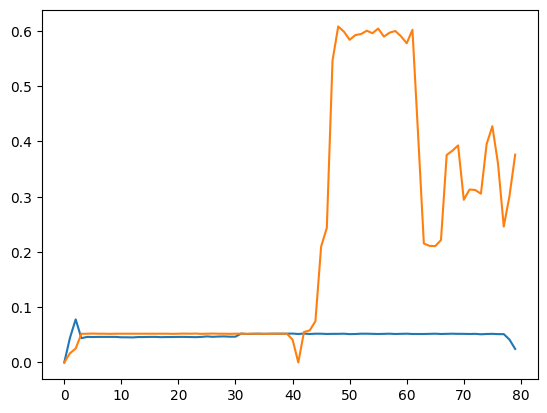

In [ ]:
plt.plot(test_X_torch[0])
plt.plot(test_y_torch[:80])

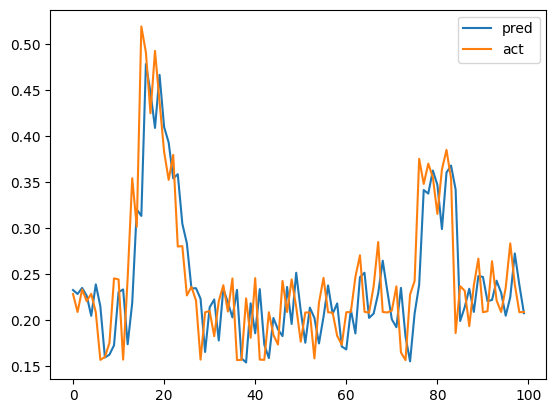

In [ ]:
plt.plot(results[3000:3100].flatten(), label = 'pred')
plt.plot(test_y_torch[3000:3100].flatten(), label = 'act')
plt.legend()

In [ ]:
def objective(trial):
    leaky_rate = trial.suggest_float("leaky_rate",0.5, 1.4)
    radius = trial.suggest_int("spectral_radius", 0.5, 700)
    hidden_size = trial.suggest_int('hidden_size', 50, 200)
    activation = self_normalizing_default(leaky_rate=leaky_rate, spectral_radius=radius)
    input_size = train_X_torch.shape[1]
    # initialize the esn
    network = GroupedDeepESN(
        # You need to specify the dimensionality of the input
        # it will later be checked whether the data provided matches the declared shape
        input_size=input_size,
        groups=3,
        num_layers=(2,4,3),
        hidden_size=hidden_size,
        initializer=regular_graph_initializer(seed=3, degree=10),
        activation=activation
    )
    network.fit(train_X_torch, train_y_torch)
    results = network(test_X_torch)
    # print(results)
    return get_metrics(test_y_torch, results.clone())['rmse']

In [ ]:
torch.set_default_dtype(torch.float64)

In [ ]:
study = optuna.create_study()
study.optimize(objective, n_trials=100)

10s sampling

In [ ]:
# 1,2,5 minutes
n_future = [6,12,30]
n_past = [80,90,100]
m_results = {}
for f,p in zip(n_future, n_past):
    print(f, p)
    train_X, train_y = create_data(train, train_indxs, params_X, params_y, f, p)
    test_X, test_y = create_data(test, test_indxs, params_X, params_y, f, p)

    train_X, train_y = prepare_data(train_X), prepare_data(train_y)
    test_X, test_y = prepare_data(test_X), prepare_data(test_y)

    train_X_torch, train_y_torch = to_torch(train_X, True),to_torch(train_y, True)
    test_X_torch, test_y_torch = to_torch(test_X, True), to_torch(test_y, True)
    input_size = train_X_torch.shape[1]
    network = create_esn(input_size)
    network.fit(train_X_torch, train_y_torch)

    results = network(test_X_torch)
    m_results['future = '+str(f)+', past = '+str(p)] = get_metrics(results, test_y_torch)


In [ ]:
m_results

In [ ]:
# 1,2,3 minutes
n_future = [6,6,12,18]
n_past = [100,80,90,100]
m_results = {}
for f,p in zip(n_future, n_past):
    print(f, p)
    train_X, train_y = create_data(train, train_indxs, params_X, params_y, f, p)
    test_X, test_y = create_data(test, test_indxs, params_X, params_y, f, p)

    train_X, train_y = prepare_data(train_X), prepare_data(train_y)
    test_X, test_y = prepare_data(test_X), prepare_data(test_y)

    train_X_torch, train_y_torch = to_torch(train_X, True),to_torch(train_y, True)
    test_X_torch, test_y_torch = to_torch(test_X, True), to_torch(test_y, True)
    input_size = train_X_torch.shape[1]
    network = create_esn(input_size)
    network.fit(train_X_torch, train_y_torch)

    results = network(test_X_torch)
    m_results['future = '+str(f)+', past = '+str(p)] = get_metrics(results, test_y_torch)


In [ ]:
m_results

Memory usage prediction

change params to predict memory

In [ ]:
params_X = [
            # 'ds',
            'jobs',
            'cpu',
            'memory',
            'io_read',
            'io_readReal',
            'io_readSyscalls',
            'io_write',
            'io_writeReal',
            'io_writeSyscalls',
            'network_rxBytes',
            'network_txPackets'
            ]
params_y = [
    # 'jobs',
    # 'cpu',
    'memory'
    ]

In [ ]:
f = 1
p= 80

In [ ]:
train_X, train_y = create_data(train, train_indxs, ['cpu'], ['cpu'], f, p)
test_X, test_y = create_data(test, test_indxs, ['cpu'], ['cpu'], f, p)

In [ ]:
# plt.plot(train_y.flatten())
plt.plot(train_X[0])
plt.plot(train_y[0])

run optuna experiment for prediction params

In [ ]:
f,p = 12, 80
train_X, train_y = create_data(train, train_indxs, params_X, params_y, f, p)
test_X, test_y = create_data(test, test_indxs, params_X, params_y, f, p)

train_X, train_y = prepare_data(train_X), prepare_data(train_y)
test_X, test_y = prepare_data(test_X), prepare_data(test_y)

train_X_torch, train_y_torch = to_torch(train_X, True),to_torch(train_y, True)
test_X_torch, test_y_torch = to_torch(test_X, True), to_torch(test_y, True)

In [ ]:
def objective(trial):
    leaky_rate = trial.suggest_float("leaky_rate",0.5, 1.4)
    radius = trial.suggest_int("spectral_radius", 0.5, 700)
    hidden_size = trial.suggest_int('hidden_size', 50, 200)
    activation = self_normalizing_default(leaky_rate=leaky_rate, spectral_radius=radius)
    input_size = train_X_torch.shape[1]
    # initialize the esn
    network = GroupedDeepESN(
        # You need to specify the dimensionality of the input
        # it will later be checked whether the data provided matches the declared shape
        input_size=input_size,
        groups=3,
        num_layers=(2,4,3),
        hidden_size=hidden_size,
        initializer=regular_graph_initializer(seed=3, degree=10),
        activation=activation
    )



    network.fit(train_X_torch, train_y_torch)

    results = network(test_X_torch)
    # print(results)
    return get_metrics(test_y_torch, results.clone())['rmse']

In [ ]:
study = optuna.create_study()
study.optimize(objective, n_trials=100)

run metrics calculation for obtained hyperparams

In [ ]:
# 1,2,3 minutes
def obtain_metrics(n_future = [6,12,30], n_past = [80,90,100]):

    m_results = {}
    for f,p in zip(n_future, n_past):
        print(f, p)
        train_X, train_y = create_data(train, train_indxs, params_X, params_y, f, p)
        test_X, test_y = create_data(test, test_indxs, params_X, params_y, f, p)

        train_X, train_y = prepare_data(train_X), prepare_data(train_y)
        test_X, test_y = prepare_data(test_X), prepare_data(test_y)

        train_X_torch, train_y_torch = to_torch(train_X, True),to_torch(train_y, True)
        test_X_torch, test_y_torch = to_torch(test_X, True), to_torch(test_y, True)
        input_size = train_X_torch.shape[1]
        network = create_esn(input_size, l_r=1.2023444050382561, s_r = 636, h_s=52)
        network.fit(train_X_torch, train_y_torch)

        results = network(test_X_torch)
        m_results['future = '+str(f)+', past = '+str(p)] = get_metrics(results, test_y_torch)
    return m_results

In [ ]:
obtain_metrics()

In [ ]:
plt.plot(test_y_torch.flatten())
plt.plot(results.flatten())

In [ ]:
plt.plot(results[1], color = 'r', label = 'pred')
plt.plot(test_y_torch[1], color = 'g', label = 'real')
plt.legend()

In [ ]:
{'future = 6, past = 100': {'rmse': tensor(0.0452),
  'smape': tensor(86.3030),
  'mae': tensor(0.0430)},
 'future = 6, past = 80': {'rmse': tensor(0.0275),
  'smape': tensor(31.7478),
  'mae': tensor(0.0243)},
 'future = 12, past = 90': {'rmse': tensor(0.0516),
  'smape': tensor(81.0944),
  'mae': tensor(0.0463)},
 'future = 18, past = 100': {'rmse': tensor(0.0745),
  'smape': tensor(144.9349),
  'mae': tensor(0.0708)}}